<a href="https://colab.research.google.com/github/daar1518/Capstone-Project/blob/main/capstone-ml/Processed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

data = pd.read_csv('heart_2020_cleaned.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Explore summary statistics
print(data.describe())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [ ]:
data.drop(['Race', ],axis=1,inplace=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.duplicated().sum()

24345

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['AgeCategory']=data['AgeCategory'].replace(['18-24','25-29'],'0') #young
data['AgeCategory']=data['AgeCategory'].replace(['30-34','35-39','40-44','45-49'],'1') #adult
data['AgeCategory']=data['AgeCategory'].replace(['50-54','55-59','60-64','65-69'],'2') #old
data['AgeCategory']=data['AgeCategory'].replace(['70-74','75-79','80 or older'],'3') #elder
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,2,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,3,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,2,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,3,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,1,No,Yes,Very good,8.0,No,No,No


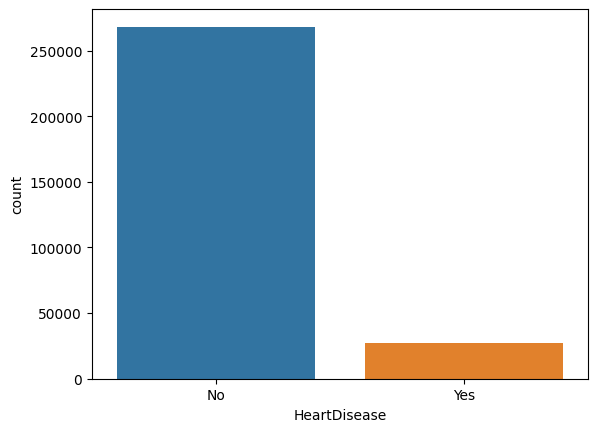

There are 268202 patients without heart disease and 27248 patients with the disease


In [ ]:
sns.countplot(x='HeartDisease',data=data)
plt.show()
result = data.HeartDisease.value_counts()
print(f"There are {result[0]} patients without heart disease and {result[1]} patients with the disease")

In [ ]:
#female = 0, male = 1
#diabetic: yes=2, risk =1, no= 1
#genhealth: poor=0, fair=1, good = 2, excellent = 3, very good =4

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for col in data:
    if col != 'BMI':
      data[col]=label.fit_transform(data[col])
data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,2,2,1,4,4,1,0,1
1,0,20.34,0,0,1,0,0,0,0,3,0,1,4,6,0,0,0
2,0,26.58,1,0,0,20,30,0,1,2,2,1,1,7,1,0,0
3,0,24.21,0,0,0,0,0,0,0,3,0,0,2,5,0,0,1
4,0,23.71,0,0,0,28,0,1,0,1,0,1,4,7,0,0,0


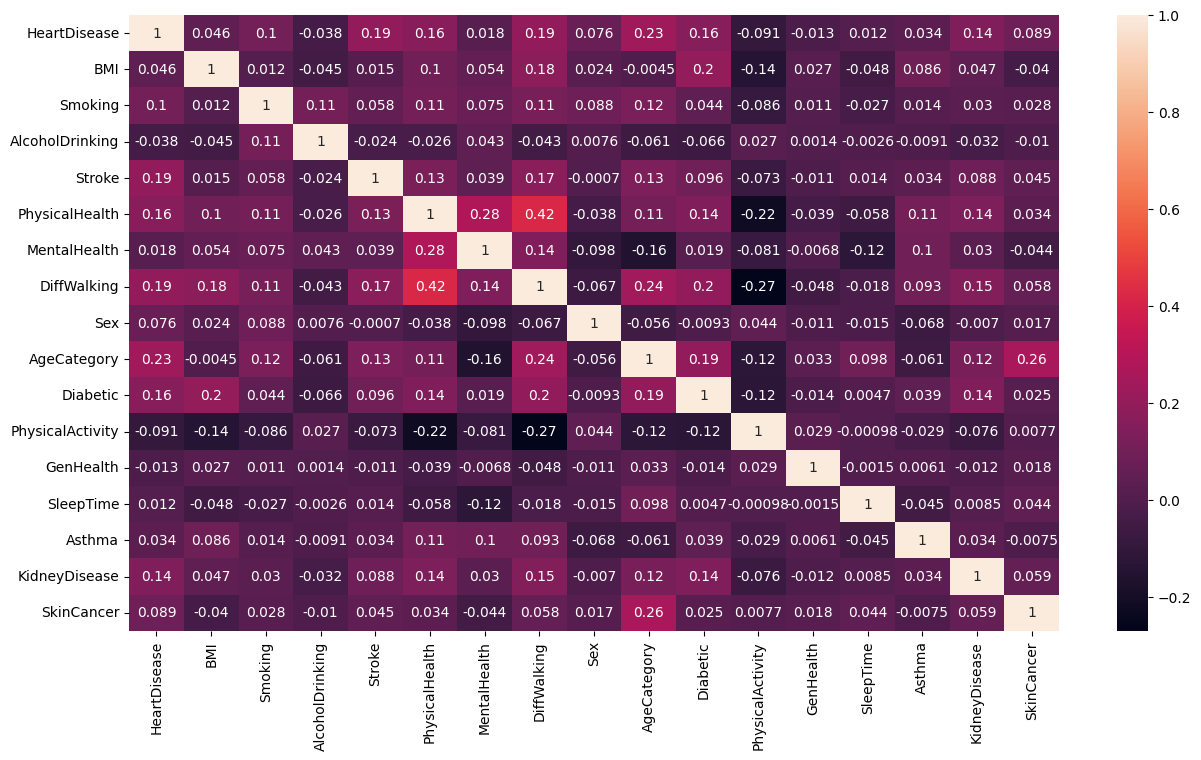

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [ ]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	14


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	14


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FA653332A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FA653332A40, verbose=2)

In [ ]:
# show the most important features
important_feat = data.columns[:-1][feat_selector.support_].tolist()
important_feat

['BMI', 'AgeCategory']

In [ ]:
# select the top 9 features
top_feat = data.columns[:-1][feat_selector.ranking_ <9].tolist()
top_feat

['BMI',
 'Smoking',
 'PhysicalHealth',
 'MentalHealth',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'GenHealth',
 'SleepTime']

In [ ]:
import statsmodels.api as sm

X_top = data[top_feat]
y = data['HeartDisease']

res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.282370
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               295450
Model:                          Logit   Df Residuals:                   295441
Method:                           MLE   Df Model:                            8
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                 0.08219
Time:                        07:46:05   Log-Likelihood:                -83426.
converged:                       True   LL-Null:                       -90897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
BMI               -0.0769      0.001    -88.343      0.000      -0.079      -0.075
Smoking            0.2573      0.013     19.642      0.000       0.232       0.283
PhysicalHealth     0.0350      0.001     52.832      0.000       0.034       0.036
MentalHealth      -0.0071      0.001     -8.549      0.000      -0.009      -0.005
Sex                0.4372      0.013     33.203      0.000       0.411       0.463
AgeCategory        0.6385      0.008     81.281      0.000       0.623       0.654
Diabetic           0.4747      0.007     63.785      0.000       0.460       0.489
GenHealth         -0.1373      0.005    -30.460      0.000      -0.146      -0.129
SleepTime         -0.2940      0.004    -78.498      0.000      -0.301      -0.287
==================================================================================
"""

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

X = data[top_feat]
y = data.iloc[:,-1]

# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

#the numbers after smote
num_after =dict(Counter(y_smote))

print(num_before, num_after)

{1: 29264, 0: 266186} {0: 266185, 1: 212948}


In [ ]:
from google.colab import files
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['BMI', 'Smoking', 'PhysicalHealth', 'MentalHealth', 'Sex', 'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime','HeartDisease']
new_data.to_csv('new_data.csv', index=False)
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data.head()

,BMI,Smoking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,GenHealth,SleepTime,HeartDisease
0,23.40,1,0,0,1,3,0,0,6,0
1,21.79,0,14,0,1,1,0,0,7,0
2,29.76,0,0,14,1,0,0,1,6,0
3,23.75,0,0,0,1,2,0,0,5,0
4,32.50,0,0,0,1,2,0,2,5,0


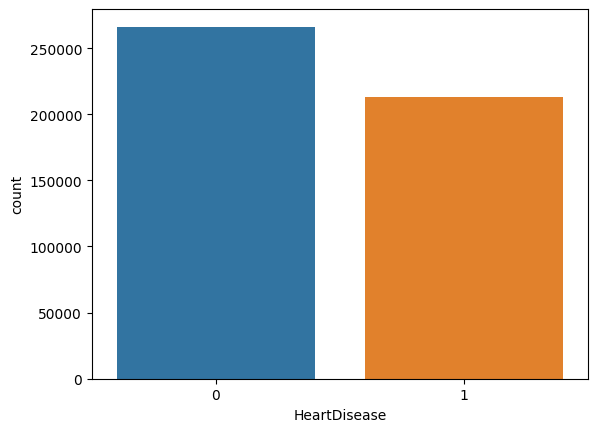

There are 266185 patients without heart disease and 212948 patients with the disease


In [ ]:
sns.countplot(x='HeartDisease',data=new_data)
plt.show()
result = new_data.HeartDisease.value_counts()
print(f"There are {result[0]} patients without heart disease and {result[1]} patients with the disease")